In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import RobustScaler

# Loading and preparing the Dataset

In [17]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"

# Column names based on UCI documentation
columns = ["variance", "skewness", "curtosis", "entropy", "class"]
bankdata = pd.read_csv(url, names=columns)

# Split features (X) and target variable (y)
X = bankdata.drop("class", axis=1).values  # Selecting all 4 features
y = bankdata["class"].values  # Target variable (0 = fake, 1 = genuine)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Training Perceptron without Feature Scaling

In [4]:
# Train Perceptron without scaling
perceptron = Perceptron(max_iter=1000, eta0=0.01, random_state=42)
perceptron.fit(X_train, y_train)

# Predictions
y_pred = perceptron.predict(X_test)

# Accuracy
accuracy_no_scaling = accuracy_score(y_test, y_pred)
print(f"Accuracy without scaling: {accuracy_no_scaling:.2f}")


Accuracy without scaling: 0.99


# Applying Feature Scaling and training the model again

In [5]:
# Apply Min-Max Scaling
minmax_scaler = MinMaxScaler()
X_train_minmax = minmax_scaler.fit_transform(X_train)
X_test_minmax = minmax_scaler.transform(X_test)

# Train perceptron on Min-Max scaled data
perceptron_minmax = Perceptron(max_iter=1000, eta0=0.01, random_state=42)
perceptron_minmax.fit(X_train_minmax, y_train)

# Predictions
y_pred_minmax = perceptron_minmax.predict(X_test_minmax)

# Accuracy
accuracy_minmax = accuracy_score(y_test, y_pred_minmax)
print(f"Accuracy with Min-Max Scaling: {accuracy_minmax:.2f}")


Accuracy with Min-Max Scaling: 0.97


In [6]:
# Apply Standardization (Z-score Normalization)
standard_scaler = StandardScaler()
X_train_standard = standard_scaler.fit_transform(X_train)
X_test_standard = standard_scaler.transform(X_test)

# Train perceptron on Standardized data
perceptron_standard = Perceptron(max_iter=1000, eta0=0.01, random_state=42)
perceptron_standard.fit(X_train_standard, y_train)

# Predictions
y_pred_standard = perceptron_standard.predict(X_test_standard)

# Accuracy
accuracy_standard = accuracy_score(y_test, y_pred_standard)
print(f"Accuracy with Standardization: {accuracy_standard:.2f}")


Accuracy with Standardization: 0.99


In [26]:

# Apply Robust Scaling
robust_scaler = RobustScaler()
X_train_robust = robust_scaler.fit_transform(X_train)
X_test_robust = robust_scaler.transform(X_test)

# Train perceptron on Robust Scaled data
perceptron_robust = Perceptron(max_iter=1000, eta0=0.01, random_state=42)
perceptron_robust.fit(X_train_robust, y_train)

# Predictions
y_pred_robust = perceptron_robust.predict(X_test_robust)

# Accuracy
accuracy_robust = accuracy_score(y_test, y_pred_robust)
print(f"Accuracy with Robust Scaling: {accuracy_robust:.2f}")

Accuracy with Robust Scaling: 0.97


In [27]:
print("\n=== Perceptron Performance Comparison ===")
print(f"Accuracy without Scaling: {accuracy_no_scaling:.2f}")
print(f"Accuracy with Min-Max Scaling: {accuracy_minmax:.2f}")
print(f"Accuracy with Standardization: {accuracy_standard:.2f}")
print(f"Accuracy with Robust Scaling: {accuracy_robust:.2f}")


=== Perceptron Performance Comparison ===
Accuracy without Scaling: 0.99
Accuracy with Min-Max Scaling: 0.97
Accuracy with Standardization: 0.99
Accuracy with Robust Scaling: 0.97


# Visualization (Plotting Decision Boundary)

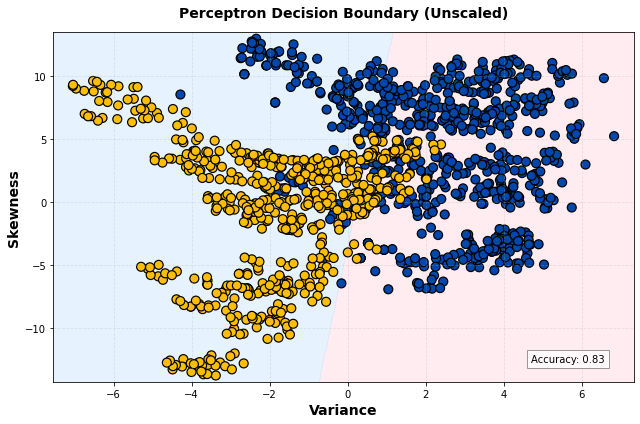


Unscaled Weights:
Variance weight: -12.4416
Skewness weight: 0.8532
Bias: 3.0000


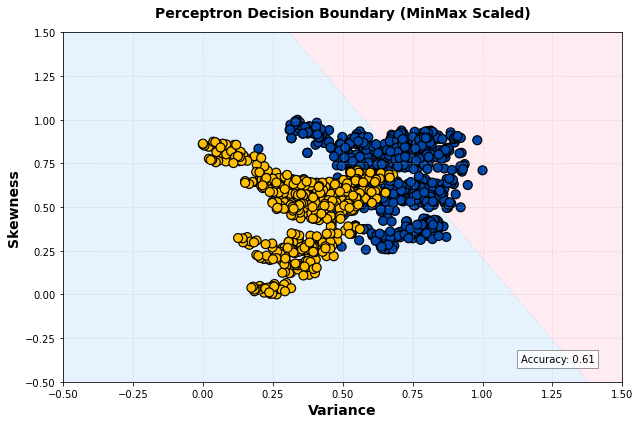


MinMax Scaled Weights:
Variance weight: -7.2005
Skewness weight: -3.8505
Bias: 8.0000


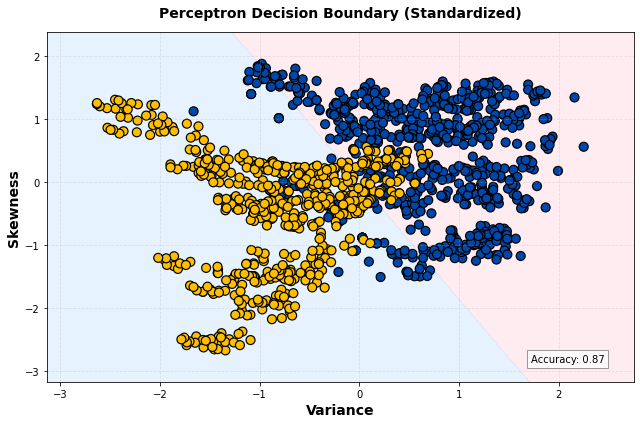


Standardized Weights:
Variance weight: -2.6695
Skewness weight: -1.4317
Bias: 0.0000


In [40]:
# Extract first two features for visualization
X = df[["variance", "skewness"]].values
y = df["class"].values

# Initialize scalers
minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()


# Create scaled versions
X_minmax = minmax_scaler.fit_transform(X)
X_standard = standard_scaler.fit_transform(X)


# Enhanced plotting function with vibrant colors
def plot_decision_boundary(X, y, model, title):
    # Define grid with higher resolution
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    
    # Predict class for each point in grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Create figure with professional styling
    plt.figure(figsize=(9, 6))
    
    # Vibrant color scheme, easy on eyes
    cmap_background = ListedColormap(['#FFD1DC', '#C1E1FF'])  
    cmap_points = ListedColormap(['#0047AB', '#FFBF00'])  # Cobalt/Amber 
    
    # Plot decision boundary with smooth contours
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=cmap_background, levels=1)
    
    # Plot data points with larger markers
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_points, 
                edgecolor='black', s=80, linewidth=1.2)
    
    # Add styling elements
    plt.xlabel("Variance", fontsize=14, fontweight='bold')
    plt.ylabel("Skewness", fontsize=14, fontweight='bold')
    plt.title(title, fontsize=14, pad=15, fontweight='bold')
    
    # Add accuracy annotation
    accuracy = model.score(X, y)
    plt.text(0.95, 0.05, f'Accuracy: {accuracy:.2f}', 
             transform=plt.gca().transAxes,
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'),
             ha='right', va='bottom')
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()


# Train and plot for each scaling method
for data, scaling_name in [(X, "Unscaled"), 
                         (X_minmax, "MinMax Scaled"), 
                         (X_standard, "Standardized")]:
    # Train Perceptron
    model = Perceptron(max_iter=1000, random_state=42)
    model.fit(data, y)
    
    # Plot decision boundary with enhanced styling
    plot_decision_boundary(data, y, model, 
                         f"Perceptron Decision Boundary ({scaling_name})")
    
    # Print feature weights
    print(f"\n{scaling_name} Weights:")
    print(f"Variance weight: {model.coef_[0][0]:.4f}")
    print(f"Skewness weight: {model.coef_[0][1]:.4f}")
    print(f"Bias: {model.intercept_[0]:.4f}")

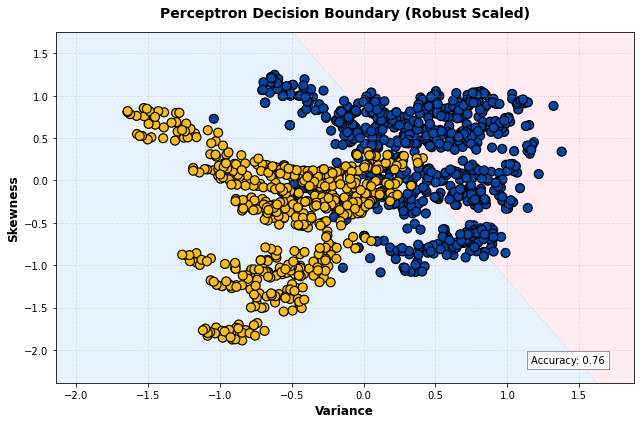


Robust Scaled Weights:
Variance weight: -2.4980
Skewness weight: -1.2788
Bias: 1.0000


In [39]:
# Scale the first two features for visualization using RobustScaler
robust_scaler_visual = RobustScaler()
X_robust = robust_scaler_visual.fit_transform(X)

# Train Perceptron on Robust Scaled data for visualization
model_robust = Perceptron(max_iter=1000, random_state=42)
model_robust.fit(X_robust, y)

# Plot decision boundary with enhanced styling
plot_decision_boundary(X_robust, y, model_robust, 
                       "Perceptron Decision Boundary (Robust Scaled)")

# Print feature weights for Robust Scaling
print("\nRobust Scaled Weights:")
print(f"Variance weight: {model_robust.coef_[0][0]:.4f}")
print(f"Skewness weight: {model_robust.coef_[0][1]:.4f}")
print(f"Bias: {model_robust.intercept_[0]:.4f}")